# Credit Card Customer dataset

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import sklearn
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Credit.csv')

In [ ]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
dataset.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [ ]:
dataset.shape

(660, 7)

In [ ]:
dataset.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


## Univariate and Bivariate Analysis

In [ ]:
dataset.describe(include='all')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
dataset.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
dataset.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


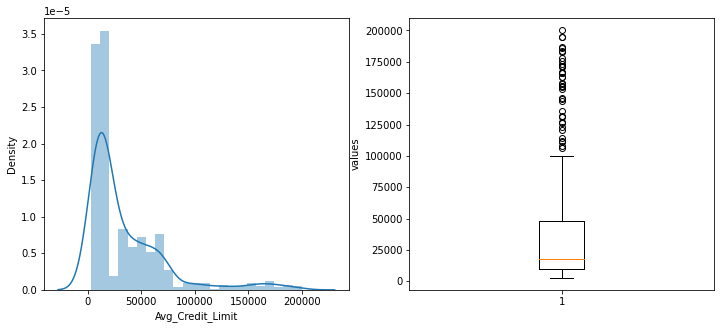

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(dataset['Avg_Credit_Limit'])
fig.add_subplot(1,2,2)
plt.boxplot(dataset['Avg_Credit_Limit'])
plt.ylabel('values')
plt.show()

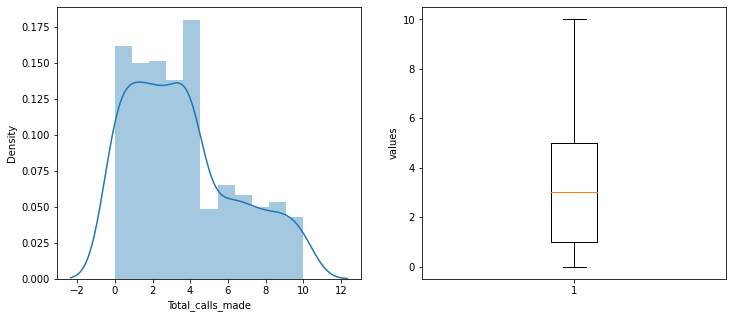

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(dataset['Total_calls_made'])
fig.add_subplot(1,2,2)
plt.boxplot(dataset['Total_calls_made'])
plt.ylabel('values')
plt.show()

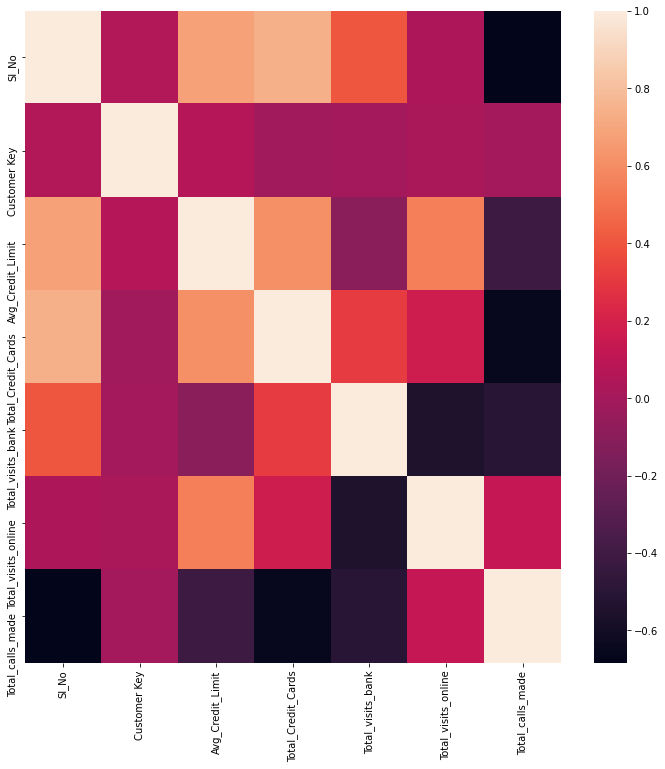

In [ ]:
cor = dataset.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns)

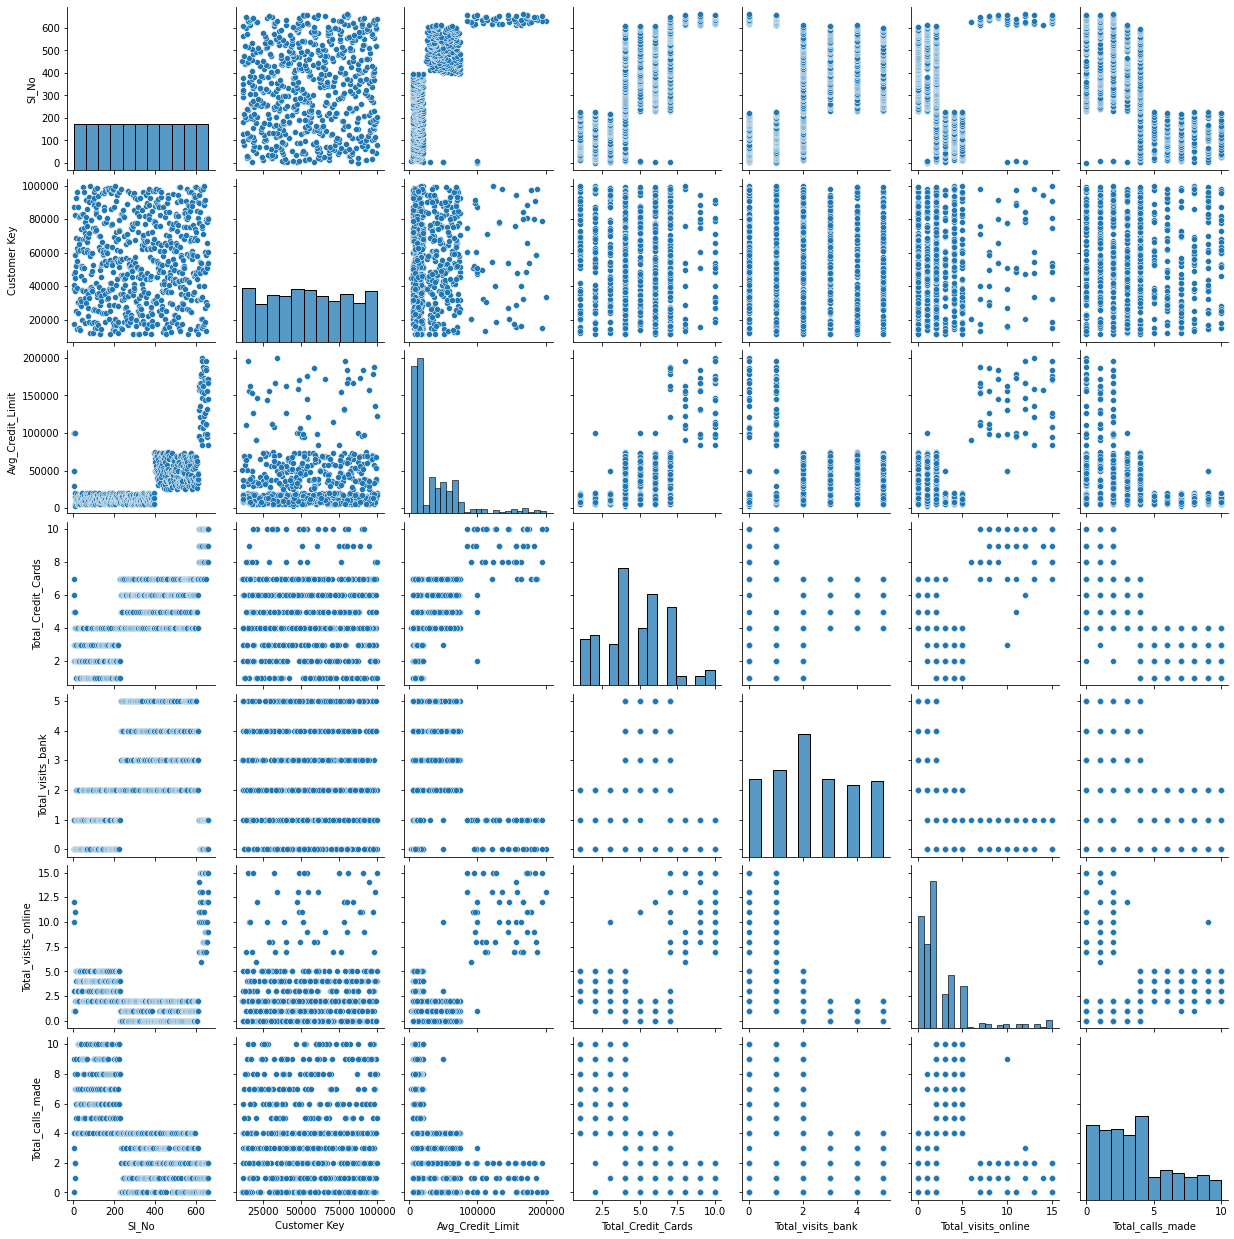

In [ ]:
sns.pairplot(dataset)

In [ ]:
modeldataset = pd.datasetFrame()
modeldataset['Avg_Credit_Limit'] = dataset['Avg_Credit_Limit']
modeldataset['Total_calls_made'] = dataset['Total_calls_made']

In [ ]:
modeldataset.columns

Index(['Avg_Credit_Limit', 'Total_calls_made'], dtype='object')

In [ ]:
modeldataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Avg_Credit_Limit  660 non-null    int64
 1   Total_calls_made  660 non-null    int64
dtypes: int64(2)
memory usage: 10.4 KB


In [ ]:
modeldataset.shape

(660, 2)

In [ ]:
modeldataset.head()

,Avg_Credit_Limit,Total_calls_made
0,100000,0
1,50000,9
2,50000,4
3,30000,4
4,100000,3


### Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
modeldataset = pd.datasetFrame(scaler.fit_transform(modeldataset), columns=['Avg_Credit_Limit', 'Total_calls_made'])

## Creating the Model

### Default Values

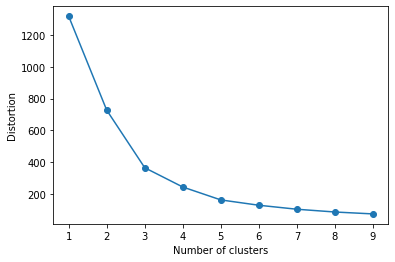

In [ ]:
from sklearn.cluster import KMeans

distortions = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(modeldataset)
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
km = KMeans(n_clusters=4)
km.fit_predict(modeldataset)

array([3, 2, 3, 1, 3, 2, 3, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_km = km.fit_predict(modeldataset)

In [ ]:
modeldataset = pd.datasetFrame(modeldataset)
modeldataset['y_km'] = y_km

In [ ]:
modeldataset.head()

,Avg_Credit_Limit,Total_calls_made,y_km
0,1.740187,-1.251537,0
1,0.410293,1.891859,1
2,0.410293,0.145528,0
3,-0.121665,0.145528,2
4,1.740187,-0.203739,0


In [ ]:
y_km

array([0, 1, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

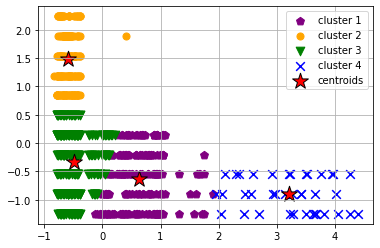

In [ ]:
plt.scatter(modeldataset[modeldataset['y_km']==0]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==0]['Total_calls_made'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldataset[modeldataset['y_km']==1]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==1]['Total_calls_made'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldataset[modeldataset['y_km']==2]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==2]['Total_calls_made'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(modeldataset[modeldataset['y_km']==3]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==3]['Total_calls_made'], s=75, c='blue', marker='x', label='cluster 4')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
pd.datasetFrame(km.cluster_centers_)

,0,1
0,0.634283,-0.631492
1,-0.595009,1.480070
2,-0.491866,-0.330069
3,3.215670,-0.902271


In [ ]:
km.labels_

array([0, 1, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
km.inertia_

242.34962107742655

In [ ]:
km.n_iter_

4

### With Different parameter values

#### Init Value as random

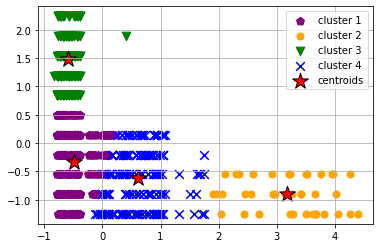

In [ ]:
modeldataset.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=4, init='random')
km.fit(modeldataset)

y_km = km.fit_predict(modeldataset)

modeldataset = pd.datasetFrame(modeldataset)
modeldataset['y_km'] = y_km

plt.scatter(modeldataset[modeldataset['y_km']==0]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==0]['Total_calls_made'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldataset[modeldataset['y_km']==1]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==1]['Total_calls_made'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldataset[modeldataset['y_km']==2]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==2]['Total_calls_made'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(modeldataset[modeldataset['y_km']==3]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==3]['Total_calls_made'], s=75, c='blue', marker='x', label='cluster 4')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
pd.datasetFrame(km.cluster_centers_)

,0,1
0,-0.498230,-0.330176
1,3.181929,-0.902271
2,-0.595009,1.480070
3,0.618347,-0.624799


#### Init Value as kmean++

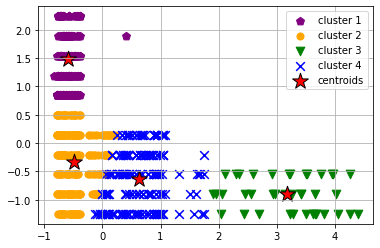

In [ ]:
modeldataset.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=4, init='k-means++')
km.fit(modeldataset)

y_km = km.fit_predict(modeldataset)

modeldataset = pd.datasetFrame(modeldataset)
modeldataset['y_km'] = y_km

plt.scatter(modeldataset[modeldataset['y_km']==0]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==0]['Total_calls_made'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldataset[modeldataset['y_km']==1]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==1]['Total_calls_made'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldataset[modeldataset['y_km']==2]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==2]['Total_calls_made'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(modeldataset[modeldataset['y_km']==3]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==3]['Total_calls_made'], s=75, c='blue', marker='x', label='cluster 4')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
pd.datasetFrame(km.cluster_centers_)

,0,1
0,-0.595009,1.480070
1,-0.491866,-0.330069
2,3.181929,-0.902271
3,0.627133,-0.629962


### N init value

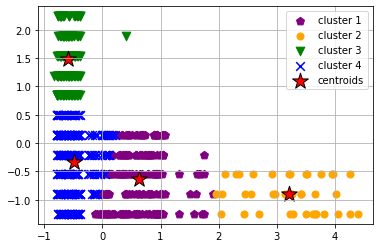

In [ ]:
modeldataset.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=4, init='random', n_init=100)
km.fit(modeldataset)

y_km = km.fit_predict(modeldataset)

modeldataset = pd.datasetFrame(modeldataset)
modeldataset['y_km'] = y_km

plt.scatter(modeldataset[modeldataset['y_km']==0]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==0]['Total_calls_made'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldataset[modeldataset['y_km']==1]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==1]['Total_calls_made'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldataset[modeldataset['y_km']==2]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==2]['Total_calls_made'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(modeldataset[modeldataset['y_km']==3]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==3]['Total_calls_made'], s=75, c='blue', marker='x', label='cluster 4')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
pd.datasetFrame(km.cluster_centers_)

,0,1
0,0.634283,-0.631492
1,3.215670,-0.902271
2,-0.595009,1.480070
3,-0.491866,-0.330069


### Max iter

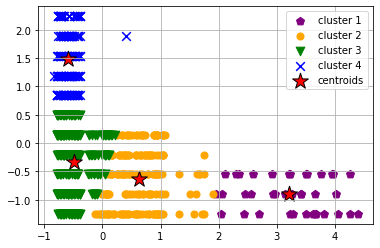

In [ ]:
modeldataset.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=4, init='random', n_init=100, max_iter=500)
km.fit(modeldataset)

y_km = km.fit_predict(modeldataset)

modeldataset = pd.datasetFrame(modeldataset)
modeldataset['y_km'] = y_km

plt.scatter(modeldataset[modeldataset['y_km']==0]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==0]['Total_calls_made'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldataset[modeldataset['y_km']==1]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==1]['Total_calls_made'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldataset[modeldataset['y_km']==2]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==2]['Total_calls_made'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(modeldataset[modeldataset['y_km']==3]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==3]['Total_calls_made'], s=75, c='blue', marker='x', label='cluster 4')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
pd.datasetFrame(km.cluster_centers_)

,0,1
0,3.215670,-0.902271
1,0.634283,-0.631492
2,-0.491866,-0.330069
3,-0.595009,1.480070


### Tol

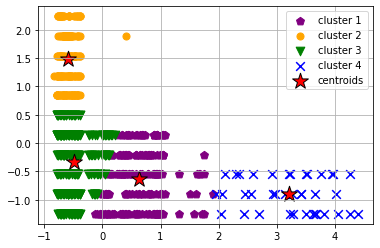

In [ ]:
modeldataset.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=4, tol=0.000001)
km.fit(modeldataset)

y_km = km.fit_predict(modeldataset)

modeldataset = pd.datasetFrame(modeldataset)
modeldataset['y_km'] = y_km

plt.scatter(modeldataset[modeldataset['y_km']==0]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==0]['Total_calls_made'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldataset[modeldataset['y_km']==1]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==1]['Total_calls_made'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldataset[modeldataset['y_km']==2]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==2]['Total_calls_made'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(modeldataset[modeldataset['y_km']==3]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==3]['Total_calls_made'], s=75, c='blue', marker='x', label='cluster 4')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
pd.datasetFrame(km.cluster_centers_)

,0,1
0,0.634283,-0.631492
1,-0.595009,1.480070
2,-0.491866,-0.330069
3,3.215670,-0.902271


### Auto algorithm

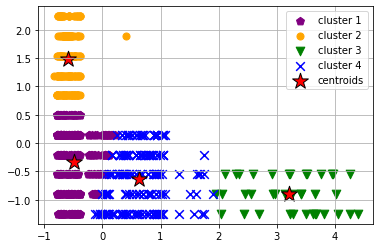

In [ ]:
modeldataset.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=4, algorithm='auto')
km.fit(modeldataset)

y_km = km.fit_predict(modeldataset)

modeldataset = pd.datasetFrame(modeldataset)
modeldataset['y_km'] = y_km

plt.scatter(modeldataset[modeldataset['y_km']==0]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==0]['Total_calls_made'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldataset[modeldataset['y_km']==1]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==1]['Total_calls_made'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldataset[modeldataset['y_km']==2]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==2]['Total_calls_made'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(modeldataset[modeldataset['y_km']==3]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==3]['Total_calls_made'], s=75, c='blue', marker='x', label='cluster 4')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
pd.datasetFrame(km.cluster_centers_)

,0,1
0,-0.491866,-0.330069
1,-0.595009,1.480070
2,3.215670,-0.902271
3,0.634283,-0.631492


### Full algorithm

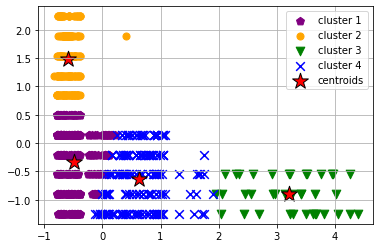

In [ ]:
modeldataset.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=4, algorithm='full')
km.fit(modeldataset)

y_km = km.fit_predict(modeldataset)

modeldataset = pd.datasetFrame(modeldataset)
modeldataset['y_km'] = y_km

plt.scatter(modeldataset[modeldataset['y_km']==0]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==0]['Total_calls_made'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldataset[modeldataset['y_km']==1]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==1]['Total_calls_made'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldataset[modeldataset['y_km']==2]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==2]['Total_calls_made'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(modeldataset[modeldataset['y_km']==3]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==3]['Total_calls_made'], s=75, c='blue', marker='x', label='cluster 4')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
pd.datasetFrame(km.cluster_centers_)

,0,1
0,-0.491866,-0.330069
1,-0.595009,1.480070
2,3.215670,-0.902271
3,0.634283,-0.631492


### Elkan algorithm

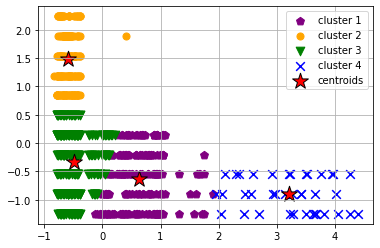

In [ ]:
modeldataset.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=4, algorithm='elkan')
km.fit(modeldataset)

y_km = km.fit_predict(modeldataset)

modeldataset = pd.datasetFrame(modeldataset)
modeldataset['y_km'] = y_km

plt.scatter(modeldataset[modeldataset['y_km']==0]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==0]['Total_calls_made'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldataset[modeldataset['y_km']==1]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==1]['Total_calls_made'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldataset[modeldataset['y_km']==2]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==2]['Total_calls_made'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(modeldataset[modeldataset['y_km']==3]['Avg_Credit_Limit'],modeldataset[modeldataset['y_km']==3]['Total_calls_made'], s=75, c='blue', marker='x', label='cluster 4')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
pd.datasetFrame(km.cluster_centers_)

,0,1
0,0.634283,-0.631492
1,-0.595009,1.480070
2,-0.491866,-0.330069
3,3.215670,-0.902271


## Inference

The datasetset can be divided into 3 different clusters as identified by the k-means clustering. We tried different values of parameters for finding the best clustering value.

# User defined dataset set

In [ ]:
from sklearn.datasetsets import make_blobs

X, y = make_blobs(
   n_samples=200, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0)

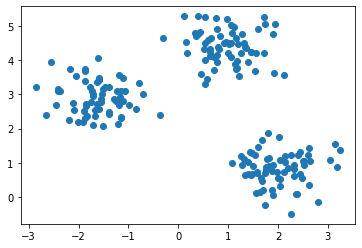

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=200, 
    tol=1e-04, random_state=0)

In [ ]:
y_km = km.fit_predict(X)

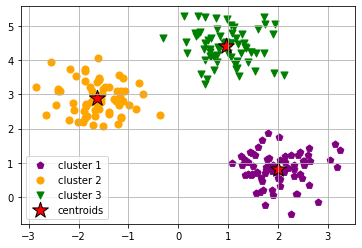

In [ ]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='purple', s=50, marker='p', label='cluster 1')

plt.scatter( X[y_km == 1, 0], X[y_km == 1, 1], c='orange', s=50, marker='o', label='cluster 2')

plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], c='green', s=50, marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
pd.datasetFrame(km.cluster_centers_)

,0,1
0,2.009558,0.831386
1,-1.625977,2.897845
2,0.965734,4.396631


In [ ]:
km.inertia_

93.99874702328013

In [ ]:
km.n_iter_

4

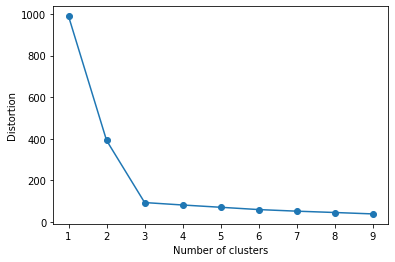

In [ ]:
distortions = []
for i in range(1,10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Inference

The datasetset can be divided into 3 different clusters as identified by the k-means clustering.